In [11]:
#1. kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

#2. verilerin yüklenmesi
v = pd.read_csv('Acoustic Features.csv')
#v.info()

In [13]:
#3. gereksiz kolonlar silindi

v = pd.read_csv('Acoustic Features.csv')
v.drop(columns=v.iloc[:,1:51], inplace=True)


# cinsiyet kolonu ekledim
v.insert(1,column="Cinsiyet",value="e")
gender_series = v.Cinsiyet.apply(lambda x: random.choice(['e', 'k']) ) 
v['Cinsiyet'] = gender_series

v.rename(columns={"Class":"Ruh Hali"},inplace=True)
v

,Ruh Hali,Cinsiyet
0,relax,k
1,relax,k
2,relax,k
3,relax,k
4,relax,k
...,...,...
395,angry,e
396,angry,k
397,angry,e
398,angry,e


In [14]:
#####4. ruh hali kategorik verilerini sayısal verilere dönüştürme işlemi
duygu = v.iloc[:,0:1].values

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
### sayısal verilere dönüştürüldü
duygu[:,0] = le.fit_transform(v.iloc[:,0])
#print(duygu)

# her kategoriyi ayrı kolon yapıyorum
ohe = preprocessing.OneHotEncoder()
duygu = ohe.fit_transform(duygu).toarray()
#duygu
#####

In [16]:
#5. verilerin birleştirilmesi

# 0:angry , 1:happy , 2:relax , 3:sad  
mood = pd.DataFrame(data=duygu, index = range(400), columns = ['angry','happy','relax','sad'])
#print(mood)

#cinsiyet = v.iloc[:,-1].values
#print(cinsiyet)

### sayısal verilere dönüştürüldü
le = preprocessing.LabelEncoder()
cinsiyet_num = le.fit_transform(v.iloc[:,-1])
#print(cinsiyet_num)

gender = pd.DataFrame(data = cinsiyet_num, index = range(400), columns = ['gender'])
#print(gender)

'''
otherCat = v.iloc[:,2:4].values
other = pd.DataFrame(data=otherCat, index = range(400), columns = ['_RMSenergy_Mean','_Lowenergy_Mean'])
#print(other)
'''

mg=pd.concat([mood,gender], axis=1)
#mo=pd.concat([mood,other], axis=1)
#table=pd.concat([mg,other], axis=1)

print(mg)

     angry  happy  relax  sad  gender
0      0.0    0.0    1.0  0.0       1
1      0.0    0.0    1.0  0.0       1
2      0.0    0.0    1.0  0.0       1
3      0.0    0.0    1.0  0.0       1
4      0.0    0.0    1.0  0.0       1
..     ...    ...    ...  ...     ...
395    1.0    0.0    0.0  0.0       0
396    1.0    0.0    0.0  0.0       1
397    1.0    0.0    0.0  0.0       0
398    1.0    0.0    0.0  0.0       0
399    1.0    0.0    0.0  0.0       1

[400 rows x 5 columns]


In [17]:
#6. Veri Kümesinin Eğitim ve Test Olarak Bölünmesi

# x:bağamsız değişken->ruh hali:mood , y:bağamlı değişken(hedef)->cinsiyet:gender 

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(mood,gender,test_size=0.33, random_state=42)


In [ ]:
#7. verilerin olceklenmesi
'''
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [ ]:
#8. tahmin
'''
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=42)
logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)
#print(y_pred)
#print(y_test)

In [19]:
#9. tahmin

#model insası(linear regression)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

tahmin = lr.predict(x_test)
tahmin

array([[0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.53125],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.53125],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.53125],
       [0.5    ],
       [0.5    ],
       [0.53125],
       [0.5    ],
       [0.53125],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.53125],
       [0.53125],
       [0.5    ],
       [0.53125],
       [0.53125],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.53125],
       [0.53125],
       [0.5    ],
       [0.53125],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.5    ],
       [0.

Text(0, 0.5, 'cinsiyet')

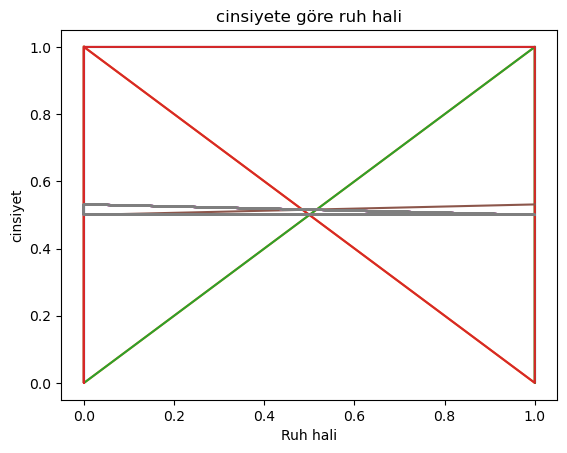

In [20]:
#10. görselleştirme
x_train = x_train.sort_index()
y_train = y_train.sort_index()

plt.plot(x_train,y_train)
plt.plot(x_test,lr.predict(x_test))

plt.title("cinsiyete göre ruh hali")
plt.xlabel("Ruh hali")
plt.ylabel("cinsiyet")